Import the packages, and load the data into an array. Import constants

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import random
from mpl_toolkits import mplot3d
import scipy as sp
from scipy.optimize import curve_fit
from scipy import stats
from scipy.integrate import quad

In [78]:
with open("df2.txt") as f: #replace with the path name to your data.txt file
    lines = f.readlines()
data = []
z = []
T = []
L_data = []

for i in lines:
    data.append([float(i[34:39]), float(i[131:139]), float(i[158: 164])])
    z.append(data[-1][0])
    L_data.append(data[-1][1])
    T.append(data[-1][2])
    
df = pd.DataFrame(data, columns = ['Redshift', 'Luminosity (From Data)', 'Temperature'])
print(df)

     Redshift  Luminosity (From Data)  Temperature
0       0.595            2.200000e+11         24.3
1       0.221            4.700000e+10         24.5
2       1.594            1.300000e+12         30.2
3       0.882            4.500000e+11         19.1
4       1.311            4.300000e+12         28.4
..        ...                     ...          ...
270     1.170            4.100000e+11         19.2
271     0.652            1.100000e+11         19.0
272     0.309            2.800000e+10         17.2
273     0.839            3.100000e+11         27.6
274     0.403            9.900000e+10         24.7

[275 rows x 3 columns]


In [82]:
c = sp.constants.c
h = sp.constants.h
pi = sp.constants.pi
k = sp.constants.k
e = np.e

Obtain the luminosity distances with the Luminosity_Distance function. z (Redshift) is the input parameter.
Luminosity_Distance returns a quantity, so we parse it into a string to obtain the numbers, then cast it back into a float.

In [80]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

LumDist_raw = []

for i in range(len(z)):
    LumDist_raw.append(cosmo.luminosity_distance(z[i]))

# print(LumDist_raw[0])
# print(LumDist_raw)

In [81]:
LumDist = []

for i in range(len(z)):
    s = str(LumDist_raw[i])
    l = len(s)
    
    cutoff = 0
    for j in range(len(s)):
        if s[j] == ' ':
            cutoff = j
    LumDist.append(s[:j-3])
    
# print(LumDist)

Obtain flux

In [109]:
A0 = 0.01
A = A0 * (2*h / c**2)
b = 0.01

def integrand(A, b, T, z, x):
    z1 = 1+z
    p1 = (x/(z1))**(3+b)
    exp = h*x/(k*T*z1)
    p2 = 1/(e**(exp)-1)
    p3 = 1/(z1)
    return A*p1*p2*p3

S = []
                                            
for i in range(len(z)):
    myS =  quad(integrand, c/1000, c/8, args=(A,b,T[i],z[i]))
    S.append(myS)
                                            
print(S[0][0])

3.1981849393842596e+18


Obtain Luminosity with flux above

In [110]:
L = []

for i in range(len(z)):
    DL = float(LumDist[i])
    L.append(4*pi*DL*DL*S[i][0])

# print(L)

Compare calculated luminosity versus the luminosity from the raw data

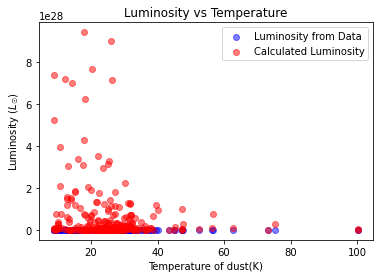

In [112]:
plt.scatter(T, L_data, color = "blue", alpha=0.5)
plt.scatter(T, L, color = "red", alpha=0.5)
plt.ylabel("Luminosity ($L_☉$)")
plt.xlabel("Temperature of dust(K)")
plt.title("Luminosity vs Temperature")
plt.legend(["Luminosity from Data", "Calculated Luminosity"], loc="upper right")
plt.show()